테스트셋 다운로드 및 분석

In [33]:
!git clone https://github.com/ndb796/Scene-Classification-Dataset 
# 폴더 안으로 이동
%cd Scene-Classification-Dataset

Cloning into 'Scene-Classification-Dataset'...
remote: Enumerating objects: 24303, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 24303 (delta 0), reused 6 (delta 0), pack-reused 24297
Receiving objects: 100% (24303/24303), 364.74 MiB | 25.29 MiB/s, done.
Resolving deltas: 100% (40/40), done.
Checking out files: 100% (24341/24341), done.
/content/Scene-Classification-Dataset/Scene-Classification-Dataset/Scene-Classification-Dataset


In [34]:
import os
import pandas as pd
path = 'train-scene classification/'
file_list = os.listdir(path + 'train/')
dataset = pd.read_csv(path + 'train.csv')
print('전체 이미지의 개수:', len(file_list))
print('학습 이미지의 개수:', len(dataset))
print('label 5 의 이미지 개수 :' ,len(dataset[dataset.label == 5]))

전체 이미지의 개수: 24335
학습 이미지의 개수: 17034
label 5 의 이미지 개수 : 2883


이미지의 해상도: (64, 64, 3)


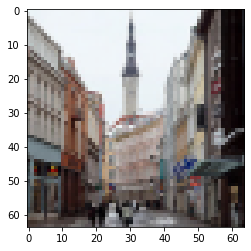

In [35]:
# 데이터 이미지중 하나 미리보기

from skimage.transform import resize
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


img = Image.open(path + 'train/' + file_list[1])
img = np.asarray(img)
img = resize(img, (64, 64, 3))
print('이미지의 해상도:', img.shape)

# 이미지 출력하기
plt.imshow(img)
plt.show()

학습데이터와 검증 데이터셋 구성

In [36]:
#https://hyjykelly.tistory.com/44

from sklearn.model_selection import train_test_split


train_dataset, val_dataset = train_test_split(dataset, test_size=0.2)

print('학습 데이터셋 크기:', len(train_dataset))
print('검증 데이터셋 크기:', len(val_dataset))


#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

#print('학습 데이터셋 크기:', len(X_train))
#print('검증 데이터셋 크기:', len(y_train))


학습 데이터셋 크기: 13627
검증 데이터셋 크기: 3407


In [37]:
#학습 데이터와 테스트 데이터로 나눴다면 데이터 세트의 구성을 설정해 준다

# 학습 데이터 (train , val)
#X (대문자)-> 텐서, 소문자는 벡터
# X_train(1376,64,64,3) 배치사이즈 1376개의 데이터 64*64 사이즈 컬러 이미지
# y_train(1376) 정답
X_train =[]
y_train=[]
#index, row[image_name'], row['label'] 으로 이루어진 data frame
for index, row in train_dataset.iterrows():
    img = Image.open( path + 'train/' + row['image_name']) #train 이미지 데이터에서 가져와서
    img = np.asarray(img) #어레이로 저장
    img = resize(img,(64,64,3)) # 크기 resize


    X_train.append(img)
    y_train.append(row['label'])

X_train = np.array(X_train) #array 객체로 만들어줌
y_train = np.array(y_train)

X_val =[]
y_val =[]

for index, row in val_dataset.iterrows():

    img= Image.open(path + 'train/' + row['image_name'])
    img = np.asarray(img)
    img = resize(img, (64,64,3))

    X_val.append(img)
    y_val.append(row['label'])

X_val= np.array(X_val)
y_val = np.array(y_val)

X_train.shape

(13627, 64, 64, 3)

데이터를 불러와서 X는 이미지, y는 정답인 레이블

In [38]:
print('학습 이미지', X_train.shape)
print('학습 레이블', y_train.shape)
print('검증 이미지', X_val.shape)
print('검증 레이블', y_val.shape)

학습 이미지 (13627, 64, 64, 3)
학습 레이블 (13627,)
검증 이미지 (3407, 64, 64, 3)
검증 레이블 (3407,)


학습 이미지 확인 - 학습 데이터셋 시각화

빌딩이라는 컬럼에 있는 이미지는 모두 빌딩이어야 한다




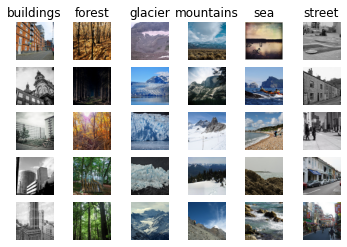

In [39]:
# 데이터 셋에서 각 클래스에 따른 일부 데이터 시각화
classes =['buildings', 'forest', 'glacier', 'mountains', 'sea','street']
# 각 클래스별 특정 개수 이미지 출력
samples_per_class = 5

#데이터 시각화 함수 구현
def visualize_data(dataset,classes, samples_per_class):
    num_classes = len(classes)
    for y, cls in enumerate(classes): 
        #인덱스와 원소 동시 접근
        idxs = np.flatnonzero(y_train == y) #특정 조건을 만족하는 인덱스를 리턴 이건 array로 리턴해줌
        idxs = np.random.choice(idxs, samples_per_class) #그렇게 만든 인덱스중 samples_perclass 만큼 무작위 선택
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y +1 
            plt.subplot(samples_per_class, num_classes, plt_idx)
            #row, col, idx
            plt.imshow(X_train[idx])
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

visualize_data(X_train, classes, samples_per_class)    

학습/검증 데이터셋 전처리

X_train: (13627, 64, 64, 3)
y_train: (13627,)
X_test: (3407, 64, 64, 3)
y_test: (3407,) 를


X_train: (13627, 12288)
y_train: (13627,)
X_test: (3407, 12288)
y_test: (3407,)

로 바꿔준다



In [26]:
X_train = X_train.reshape(13627,12288)
X_val = X_val.reshape(3407,12288)